In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dispatch
dispatch_df = pd.read_csv('../data/dispatch_results_20150101-20241231.csv', index_col=0, parse_dates=True).fillna(0)

# Load revenue
revenue_df = pd.read_csv('../data/revenue_results_20150101-20241231.csv', index_col=0, parse_dates=True).fillna(0)

# Check the data
dispatch_df.head()
revenue_df.head()


,AT,BE,BG,CH,CZ,DE_LU,DK_2,EE,ES,FI,...,NO_2_NSL,NO_3,NO_5,PL,PT,RO,RS,SI,SK,year
2015-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,198.00,0.0,0.0,0.0,2015
2015-01-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,175.59,0.0,0.0,0.0,2015
2015-01-01 02:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,120.72,0.0,0.0,0.0,2015
2015-01-01 03:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,93.87,0.0,0.0,0.0,2015
2015-01-01 04:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,83.02,0.0,0.0,0.0,2015


In [ ]:
dispatch_df.sum(axis=1).plot(figsize=(15,5), title='Total Dispatch Over Time', ylabel='MW')

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Axes: title={'center': 'Total Revenue Over Time'}, ylabel='€'>

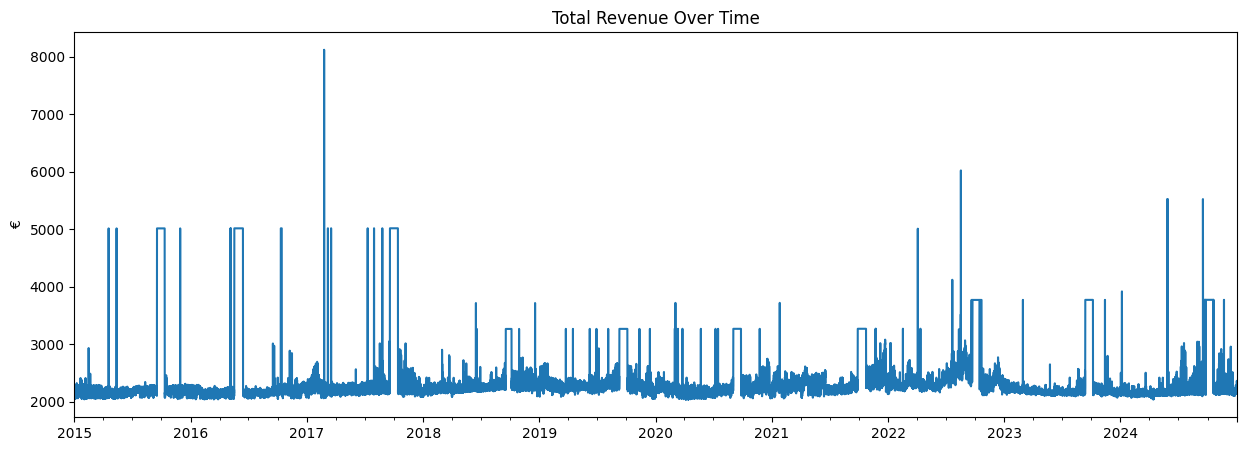

In [20]:
revenue_df.sum(axis=1).plot(figsize=(15,5), title='Total Revenue Over Time', ylabel='€')

<Axes: title={'center': 'Total Dispatch by Market'}>

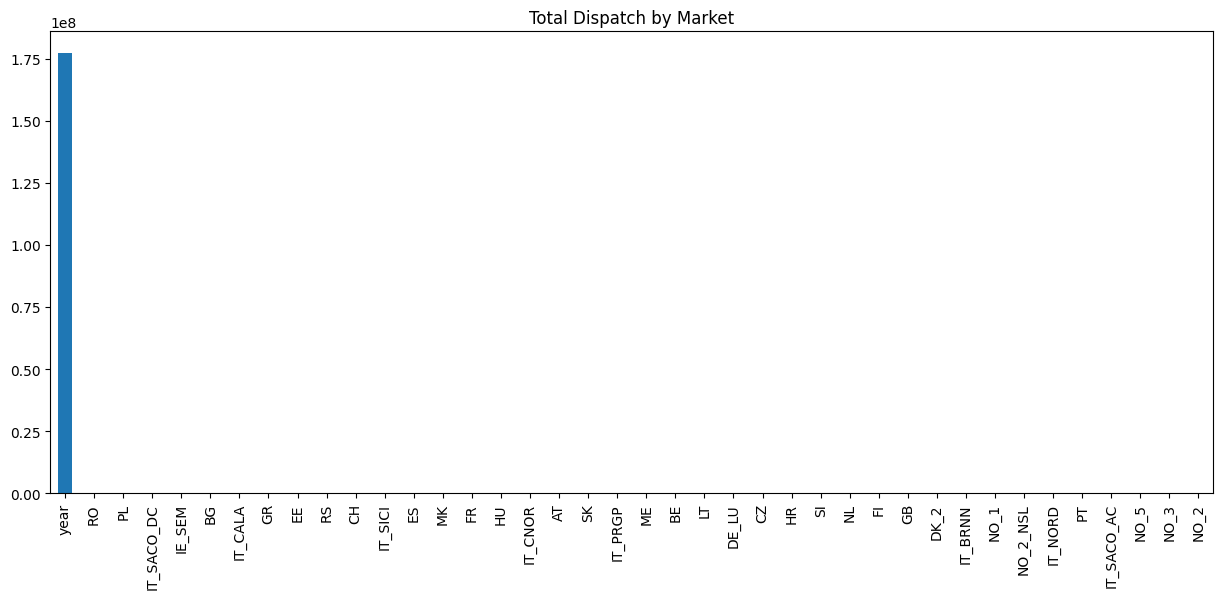

In [21]:
dispatch_df.sum(axis=0).sort_values(ascending=False).plot(kind='bar', figsize=(15,6), title='Total Dispatch by Market')


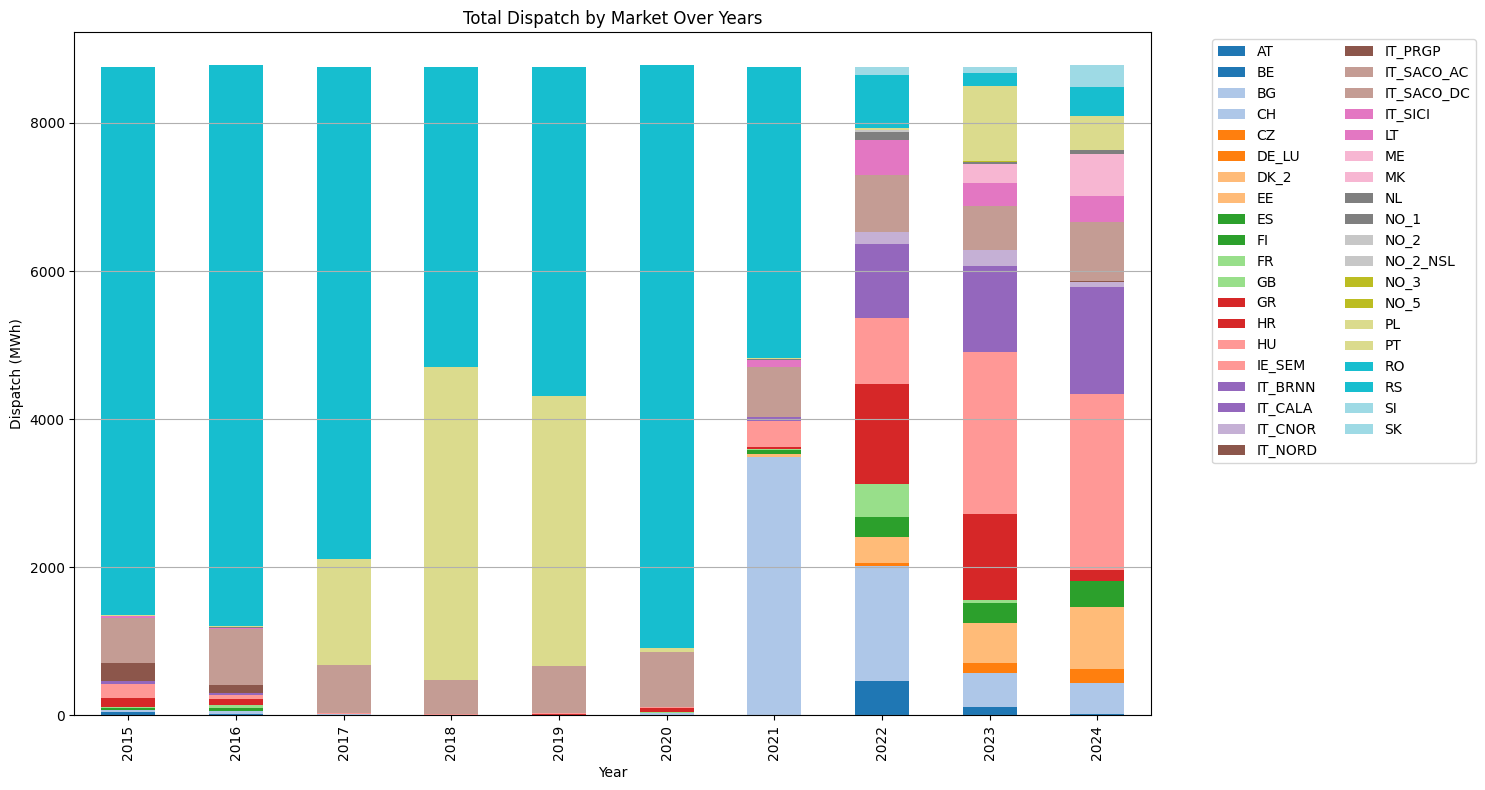

In [ ]:
dispatch_df_with_year = dispatch_df.copy()
dispatch_df_with_year['year'] = dispatch_df_with_year.index.year


# Group by year, then sum dispatch for each market
yearly_dispatch = dispatch_df_with_year.groupby('year').sum()

yearly_dispatch.head()

ax = yearly_dispatch.plot(
    kind='bar',
    stacked=True,
    figsize=(15,8),
    colormap='tab20'  # or any nice color palette
)

plt.title('Total Dispatch by Market Over Years')
plt.ylabel('Dispatch (MWh)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



<Axes: title={'center': 'Total Revenue by Market'}>

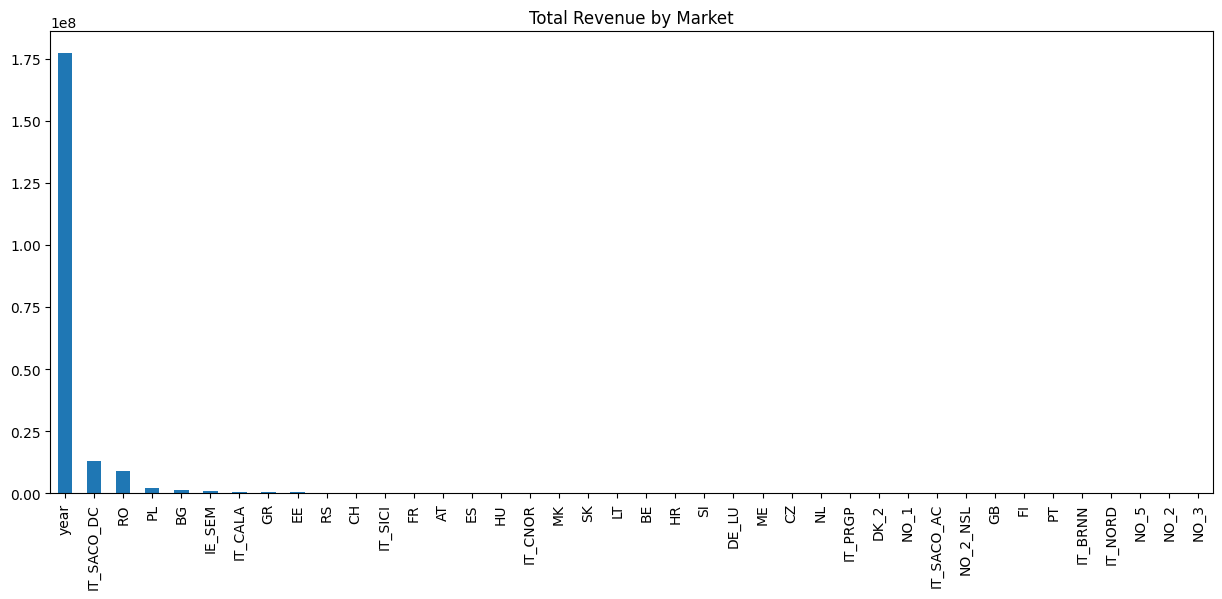

In [23]:
revenue_df.sum(axis=0).sort_values(ascending=False).plot(kind='bar', figsize=(15,6), title='Total Revenue by Market')


<Axes: title={'center': 'Average Price per MWh by Market'}>

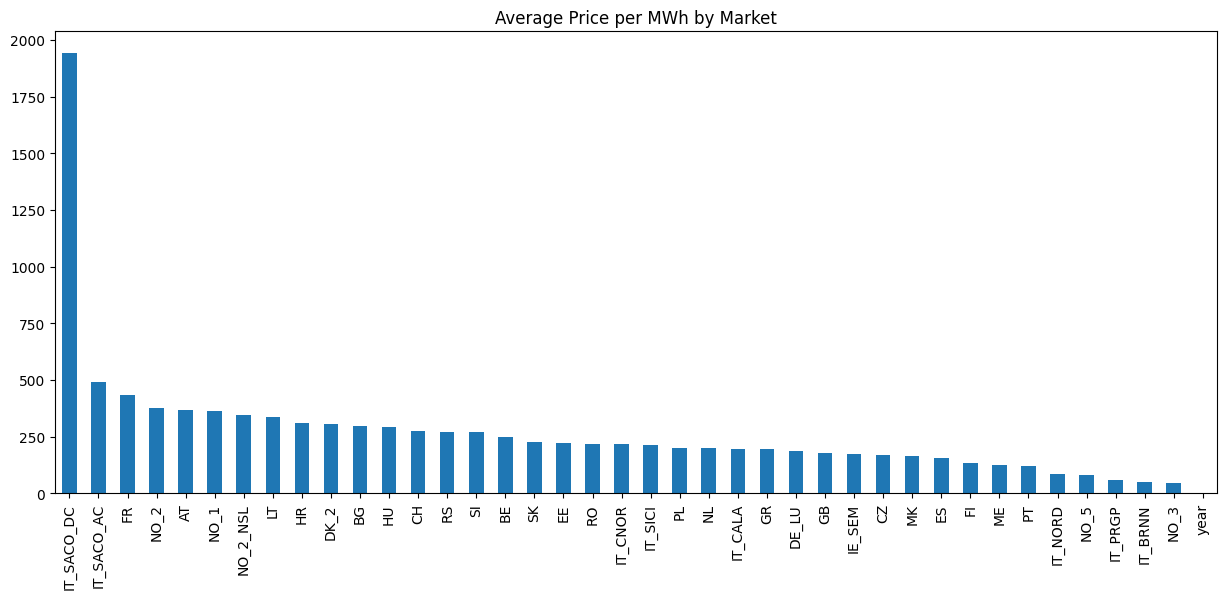

In [24]:
average_price_df = (revenue_df / dispatch_df).replace([float('inf'), -float('inf')], pd.NA)

average_price_df.mean(axis=0).dropna().sort_values(ascending=False).plot(kind='bar', figsize=(15,6), title='Average Price per MWh by Market')


<Axes: title={'center': 'Extreme Price Events (≥ 1000 €/MWh) per Market'}>

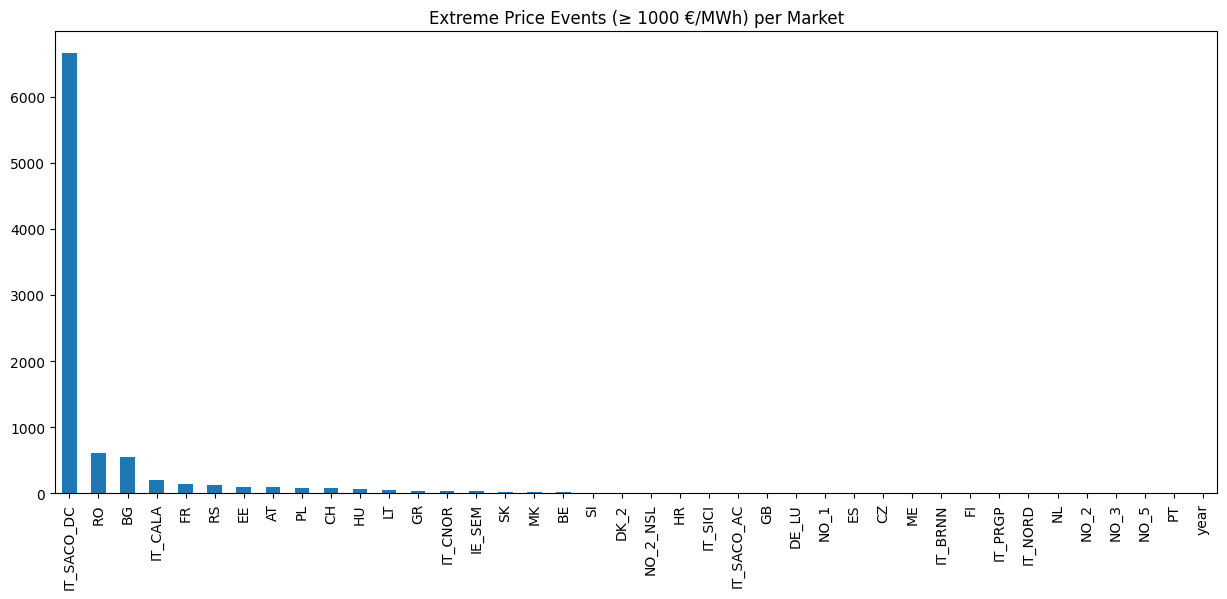

In [25]:
# Avoid division by zero
price_df = (revenue_df / dispatch_df).replace([float('inf'), -float('inf')], pd.NA)

# Boolean DataFrame where prices exceed 1000 €/MWh
extreme_prices_mask = price_df >= 500

extreme_market_counts = extreme_prices_mask.sum(axis=0).sort_values(ascending=False)

extreme_market_counts.plot(kind='bar', figsize=(15,6), title='Extreme Price Events (≥ 1000 €/MWh) per Market')
